In [1]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import matplotlib.cbook as cbook
import matplotlib.image as image
import numpy as np
import pandas as pd
from fastf1 import utils

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
qualy = 'Q'
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :SQ
Piloto 1: PER
Piloto 2: LEC


In [4]:
# load a session and its telemetry data
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Sprint [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '77', '24', '6', '18', '3', '5', '10', '23', '16', '11', '44', '14', '31', '55', '4', '63', '1', '22', '47']


In [5]:
piloto1 = session.get_driver(driver1)
piloto2 = session.get_driver(driver2)

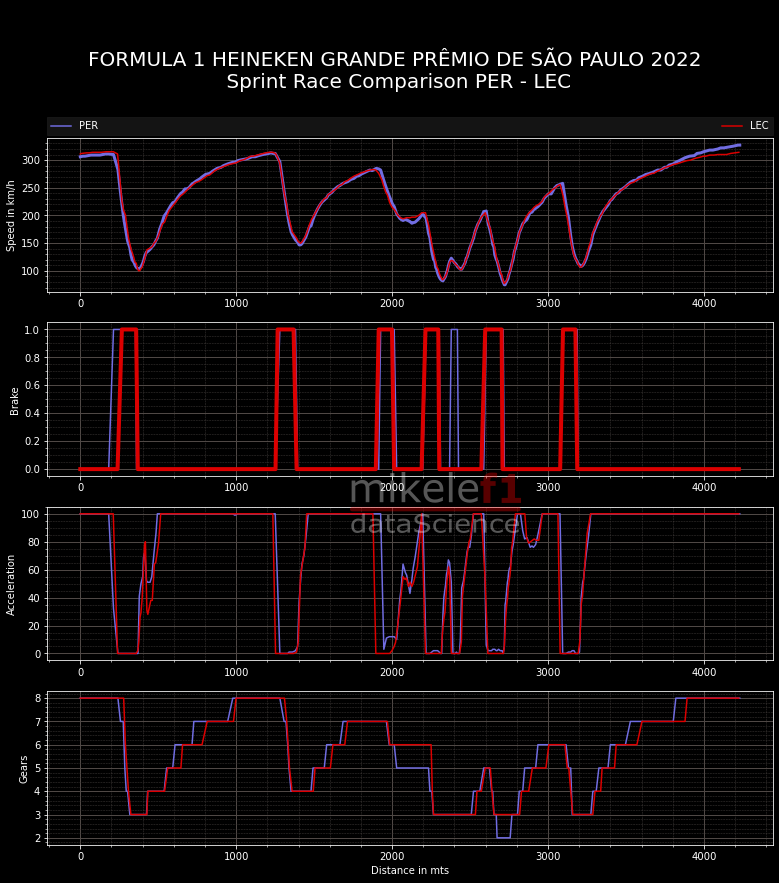

In [6]:
pil1 = session.laps.pick_driver(driver1).pick_fastest()
pil2 = session.laps.pick_driver(driver2).pick_fastest()

color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)

delta_time, ref_tel, compare_tel = utils.delta_time(pil2, pil1)

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)
    
    #Modo oscuro
plt.style.use('dark_background')


plt.rcParams['figure.figsize'] = [13, 13]
fig, ax = plt.subplots(4)
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax[0].plot(ref_tel['Distance'], ref_tel['Speed'],
        color=color1, label=piloto1['Abbreviation'])
ax[0].plot(compare_tel['Distance'], compare_tel['Speed'],
        color=color2, label=piloto2['Abbreviation'])

ax[0].set_ylabel('Speed in km/h')
ax[0].legend
#twin = ax[0].twinx()
#twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
#twin.set_ylabel(f"<------- {driver1} | {driver2} ------->")

#-------------
ax[1].plot(ref_tel['Distance'], ref_tel['Brake'],
        color=color1, label={driver1})
ax[1].plot(compare_tel['Distance'], compare_tel['Brake'],
        color=color2, label={driver2})

ax[1].set_ylabel('Brake')
ax[1].legend
#--------------
ax[2].plot(ref_tel['Distance'], ref_tel['Throttle'],
        color=color1, label={driver1})
ax[2].plot(compare_tel['Distance'], compare_tel['Throttle'],
        color=color2, label={driver2})

ax[2].set(ylabel='Acceleration')
ax[2].legend
#--------------
ax[3].plot(ref_tel['Distance'], ref_tel['nGear'],
        color=color1, label={driver1})
ax[3].plot(compare_tel['Distance'], compare_tel['nGear'],
        color=color2, label={driver2})
ax[3].set_xlabel('Distance in mts')
ax[3].set(ylabel='Gears')
ax[3].legend
#--------------
if ses== 'R':
    titulo = 'Race'
elif ses == 'FP1' or ses == 'FP2' or ses == 'FP2':
    titulo = ses
elif ses == 'Q':
    titulo = 'Qualy'
elif ses == 'SQ':
    titulo = 'Sprint Race'
else:
    titulo = 'Qualy'

ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)
plt.suptitle(f"\n\n{session.event['OfficialEventName']} \n {titulo} Comparison {driver1} - {driver2} \n"
             , size=20, y=1.02)

fig.figimage(im, xo=350, yo=350, zorder=13, alpha=.35)

ax[0].get_lines()[0].set_linewidth(3)
ax[1].get_lines()[1].set_linewidth(4)

#plt.savefig("2022-12-{sess}-C-{driver1}-{driver2}.png")
#plt.savefig("2022-13-R-VER-HAM.png")

nombrearchivo = str(year)+'-'+str(wknd)+'-LC'+ses+'-'+driver1+'-'+driver2+'.png'
plt.savefig(nombrearchivo)

plt.show(1)
